In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import *
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [ ]:
urltrain = "/content/drive/MyDrive/cs-training.csv"
train = pd.read_csv(urltrain)
train = train.drop(train.iloc[:,0:1],axis=1)
Y_train = train['SeriousDlqin2yrs']
X_train = train.drop(['SeriousDlqin2yrs'], axis = 1)

In [ ]:
urltest = "/content/drive/MyDrive/cs-test.csv"
test = pd.read_csv(urltest)
test = test.drop(columns = {"SeriousDlqin2yrs"}, axis = 1)
X_test = test.drop(test.iloc[:,0:1],axis=1)

In [ ]:
url_test_labels = "/content/drive/MyDrive/sampleEntry.csv"
label_proba = pd.read_csv(url_test_labels)
label_proba = label_proba.drop(label_proba.iloc[:, 0:1],axis = 1).values
Y_test = []
for i in label_proba:
  if(i > 0.5):
    Y_test.append(1)
  else:
    Y_test.append(0)

In [ ]:
X_test['labels'] = Y_test

In [ ]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(X_train)
X_train = imp_mean.transform(X_train)

In [ ]:
X_test = X_test.dropna()

In [ ]:
Y_test = X_test['labels']
X_test = X_test.drop(['labels'], axis = 1)

In [ ]:
sc = StandardScaler()
sc = sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size=0.30, random_state = 0)

Accuracy Score For Test (max depth = 25) : 0.9931572481572482
Precision Score For Test (max depth = 25) : 0.9931572481572482
Recall Score For Test (max depth = 25) : 0.9931572481572482

Accuracy Score For Test (max depth = 50) : 0.9928501228501229
Precision Score For Test (max depth = 50) : 0.9928501228501229
Recall Score For Test (max depth = 50) : 0.9928501228501229

Accuracy Score For Test (max depth = 75) : 0.9913390663390663
Precision Score For Test (max depth = 75) : 0.9913390663390663
Recall Score For Test (max depth = 75) : 0.9913390663390663

Accuracy Score For Test (max depth = 100) : 0.9907002457002457
Precision Score For Test (max depth = 100) : 0.9907002457002457
Recall Score For Test (max depth = 100) : 0.9907002457002457

Accuracy Score For Test (max depth = 125) : 0.9904668304668305
Precision Score For Test (max depth = 125) : 0.9904668304668305
Recall Score For Test (max depth = 125) : 0.9904668304668305

Accuracy Score For Test (max depth = 150) : 0.9901965601965602
P

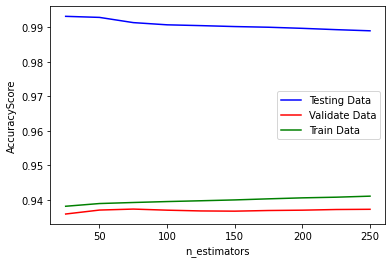

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *
arr = [25,50,75,100,125,150,175,200,225,250]
test_plot = []
validate_plot = []
train_plot = []
for i in arr:
  model = GradientBoostingClassifier(n_estimators = i)
  model = model.fit(X_train,Y_train)
  pred_test = model.predict(X_test)
  val_test = model.predict(X_validate)
  train_test = model.predict(X_train)
  accuracy_score_test = accuracy_score(Y_test,pred_test)
  recall_score_test = recall_score(Y_test,pred_test,average = "micro")
  precision_score_test = precision_score(Y_test,pred_test,average = "micro")
  test_plot.append(accuracy_score_test)

  recall_score_validate = recall_score(Y_validate, val_test, average = "micro")
  precision_score_validate = precision_score(Y_validate, val_test, average = "micro")
  accuracy_score_validate = accuracy_score(Y_validate, val_test)
  validate_plot.append(accuracy_score_validate)

  recall_score_train = recall_score(Y_train, train_test, average = "micro")
  precision_score_train = precision_score(Y_train, train_test, average = "micro")
  accuracy_score_train = accuracy_score(Y_train, train_test)
  train_plot.append(accuracy_score_train)
  print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
  print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
  print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
  print()
plt.xlabel("n_estimators")
plt.ylabel("AccuracyScore")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,train_plot,'g',label = "Train Data")
plt.legend()

Accuracy Score For Training (n_estimators = 25) : 0.9381496598639456
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     68646
           1       0.64      0.14      0.23      4854

    accuracy                           0.94     73500
   macro avg       0.79      0.57      0.60     73500
weighted avg       0.92      0.94      0.92     73500



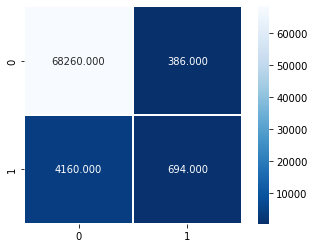

In [ ]:
import seaborn as sns
model = GradientBoostingClassifier(n_estimators = 25)
model = model.fit(X_train,Y_train)
pred_train = model.predict(X_train)
accuracy_score_train = accuracy_score(Y_train,pred_train)
print("Accuracy Score For Training (n_estimators = " + str(25) + ") : " + str(accuracy_score_train))
print(classification_report(Y_train,pred_train))
cm = confusion_matrix(Y_train,pred_train)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score For Validate (n_estimators = 25) : 0.9359047619047619
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     29363
           1       0.63      0.14      0.22      2137

    accuracy                           0.94     31500
   macro avg       0.78      0.56      0.59     31500
weighted avg       0.92      0.94      0.92     31500



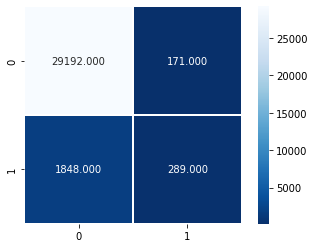

In [ ]:
pred_validate = model.predict(X_validate)
accuracy_score_validate = accuracy_score(Y_validate,pred_validate)
print("Accuracy Score For Validate (n_estimators = " + str(25) + ") : " + str(accuracy_score_validate))
print(classification_report(Y_validate,pred_validate))
cm = confusion_matrix(Y_validate,pred_validate)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score For testing (n_estimators = 25) : 0.9931572481572482
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80040
           1       0.85      0.72      0.78      1360

    accuracy                           0.99     81400
   macro avg       0.92      0.86      0.89     81400
weighted avg       0.99      0.99      0.99     81400



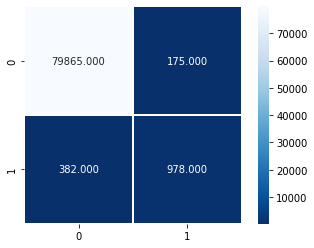

In [ ]:
pred_test = model.predict(X_test)
accuracy_score_test = accuracy_score(Y_test,pred_test)
print("Accuracy Score For testing (n_estimators = " + str(25) + ") : " + str(accuracy_score_test))
print(classification_report(Y_test,pred_test))
cm = confusion_matrix(Y_test,pred_test)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score For Test (max depth = 1) : 0.9318673218673219
Precision Score For Test (max depth = 1) : 0.9318673218673219
Recall Score For Test (max depth = 1) : 0.9318673218673219

Accuracy Score For Test (max depth = 2) : 0.931977886977887
Precision Score For Test (max depth = 2) : 0.931977886977887
Recall Score For Test (max depth = 2) : 0.931977886977887

Accuracy Score For Test (max depth = 3) : 0.9336609336609336
Precision Score For Test (max depth = 3) : 0.9336609336609336
Recall Score For Test (max depth = 3) : 0.9336609336609336

Accuracy Score For Test (max depth = 4) : 0.9315233415233415
Precision Score For Test (max depth = 4) : 0.9315233415233415
Recall Score For Test (max depth = 4) : 0.9315233415233415

Accuracy Score For Test (max depth = 5) : 0.9287592137592138
Precision Score For Test (max depth = 5) : 0.9287592137592138
Recall Score For Test (max depth = 5) : 0.9287592137592138

Accuracy Score For Test (max depth = 6) : 0.9404422604422604
Precision Score For Test (m

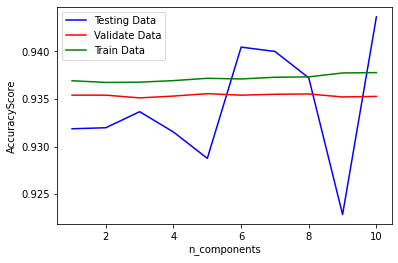

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import *

arr = [1,2,3,4,5,6,7,8,9,10]
test_plot = []
validate_plot = []
train_plot = []
for i in arr:
  clf = PCA(n_components = i)
  x_tra = clf.fit_transform(X_train)
  x_val = clf.fit_transform(X_validate)
  x_tes = clf.fit_transform(X_test)
  model = GradientBoostingClassifier(n_estimators = 25)
  model = model.fit(x_tra,Y_train)
  pred_test = model.predict(x_tes)
  val_test = model.predict(x_val)
  train_test = model.predict(x_tra)
  accuracy_score_test = accuracy_score(Y_test,pred_test)
  recall_score_test = recall_score(Y_test,pred_test,average = "micro")
  precision_score_test = precision_score(Y_test,pred_test,average = "micro")
  test_plot.append(accuracy_score_test)

  recall_score_validate = recall_score(Y_validate, val_test, average = "micro")
  precision_score_validate = precision_score(Y_validate, val_test, average = "micro")
  accuracy_score_validate = accuracy_score(Y_validate, val_test)
  validate_plot.append(accuracy_score_validate)

  recall_score_train = recall_score(Y_train, train_test, average = "micro")
  precision_score_train = precision_score(Y_train, train_test, average = "micro")
  accuracy_score_train = accuracy_score(Y_train, train_test)
  train_plot.append(accuracy_score_train)
  print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
  print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
  print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
  print()
plt.xlabel("n_components")
plt.ylabel("AccuracyScore")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,train_plot,'g',label = "Train Data")
plt.legend()